In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [20]:
from scipy.cluster.vq import whiten

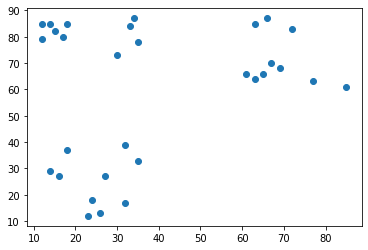

In [2]:
# Pokemon sightings

x_cord = np.concatenate((np.random.randint(10, 40, 10), np.random.randint(60, 90, 10), np.random.randint(10, 40, 10)))
y_cord = np.concatenate((np.random.randint(10, 40, 10), np.random.randint(60, 90, 10), np.random.randint(60, 90, 10)))

plt.scatter(x_cord, y_cord)
plt.show()

In [3]:
df = pd.DataFrame({'x_cord': x_cord, 'y_cord': y_cord})
df.head()

x_cord  y_cord
0      14      29
1      26      13
2      18      37
3      24      18
4      27      27

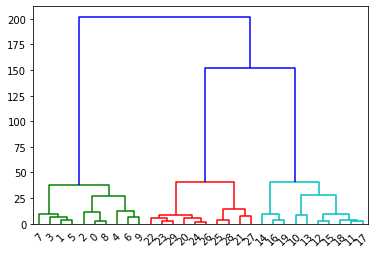

In [4]:
Z = linkage(df, 'ward')
dn = dendrogram(Z)
plt.show()

In [5]:
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')
df.head()

x_cord  y_cord  cluster_labels
0      14      29               1
1      26      13               1
2      18      37               1
3      24      18               1
4      27      27               1

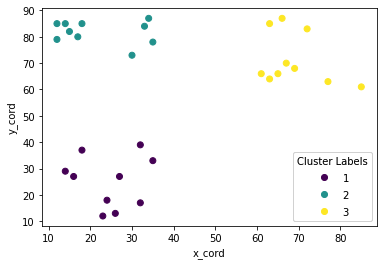

In [6]:
fig, ax = plt.subplots()
scatter = ax.scatter(df.x_cord, df.y_cord, c=df.cluster_labels)

# legends
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('x_cord')
ax.set_ylabel('y_cord')
plt.show()

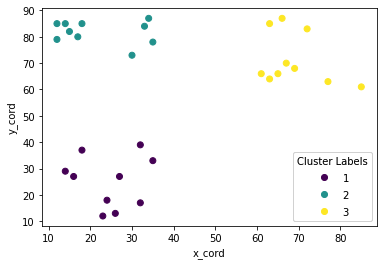

In [7]:
eucl_ward_dist_matrix = linkage(df[['x_cord', 'y_cord']], method='ward', metric='euclidean')
df['clst_label_eucl'] = fcluster(eucl_ward_dist_matrix, 3, criterion='maxclust')
fig, ax = plt.subplots()
scatter = ax.scatter(df.x_cord, df.y_cord, c=df.clst_label_eucl)

# legends
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('x_cord')
ax.set_ylabel('y_cord')
plt.show()

using <font color=blue>'single'</font> method

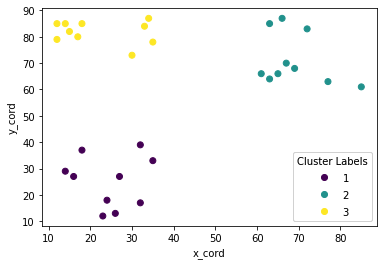

In [8]:
eucl_single_dist_matrix = linkage(df[['x_cord', 'y_cord']], method='single', metric='euclidean')
df['clst_label_single_eucl'] = fcluster(eucl_single_dist_matrix, 3, criterion='maxclust')
fig, ax = plt.subplots()
scatter = ax.scatter(df.x_cord, df.y_cord, c=df.clst_label_single_eucl)

# legends
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('x_cord')
ax.set_ylabel('y_cord')
plt.show()

## creating a distance matrix using linkage

`scipy.cluster.hierarchy.linkage(observations,
                                 method=`<font color=red>'single'</font>`,
                                 metric=`<font color=red>'euclidean'</font>`,
                                 optimal_ordering=`<font color=blue>False</font>`)`

* method: how to calculate the proximity of clusters
* metric: distance metric
* optimal_ordering: order data points

### Which method should use?
* single: based on two closest objects
* complete: based on two farthest objects
* average: based on the arithmetic mean of all objects
* centroid: based on the geometric mean of all objects
* median: based on the median of all objects
* ward: based on the sum of squares.

In [10]:
df_eg = pd.DataFrame({'x': [2, 3, 5, 6, 2],
                      'y': [1, 1, 5, 5, 2],
                      'labels': ['A', 'A', 'B', 'B', 'A']})
df_eg

x  y labels
0  2  1      A
1  3  1      A
2  5  5      B
3  6  5      B
4  2  2      A

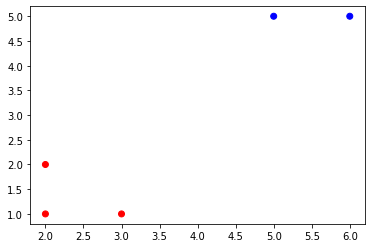

In [13]:
colors = {'A': 'red', 'B': 'blue'}
fig, ax = plt.subplots()
ax.scatter(df_eg.x, df_eg.y, c=df_eg.labels.apply(lambda x: colors[x]))
plt.show()

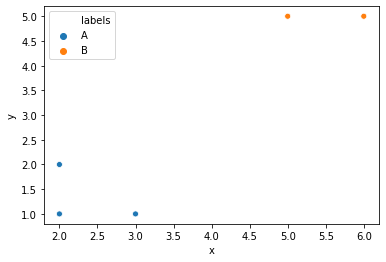

In [14]:
sns.scatterplot(x ='x', y='y', hue='labels', data=df_eg)
plt.show()

In [15]:
fifa = pd.read_csv("./data/fifa_18_sample_data.csv")
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 816.5+ KB


In [21]:
'sliding_tackle' in fifa.columns
fifa['scaled_sliding_tackle'] = whiten(fifa.sliding_tackle.values)
fifa['scaled_aggression'] = whiten(fifa.aggression.values)

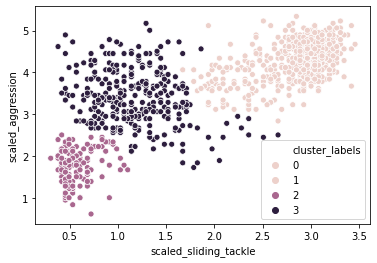

In [22]:
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
sns.scatterplot(x='scaled_sliding_tackle',
                y='scaled_aggression',
                hue='cluster_labels',
                data=fifa)
plt.show()